In [1]:
from math import ceil

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
# Load penguin dataset
anscombe = sns.load_dataset('anscombe')
print(anscombe.shape)
anscombe.head()

(44, 3)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


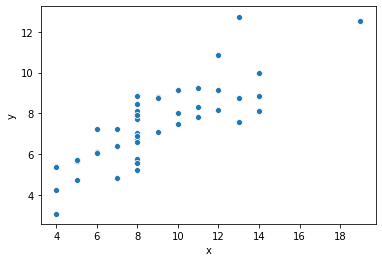

In [6]:
# Plot data
sns.scatterplot(data=anscombe, x='x', y='y')

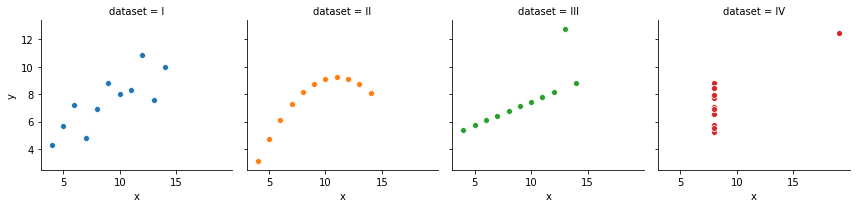

In [7]:
# Plot data by dataset
g = sns.FacetGrid(anscombe, col='dataset', hue='dataset')
g.map(sns.scatterplot, 'x', 'y')

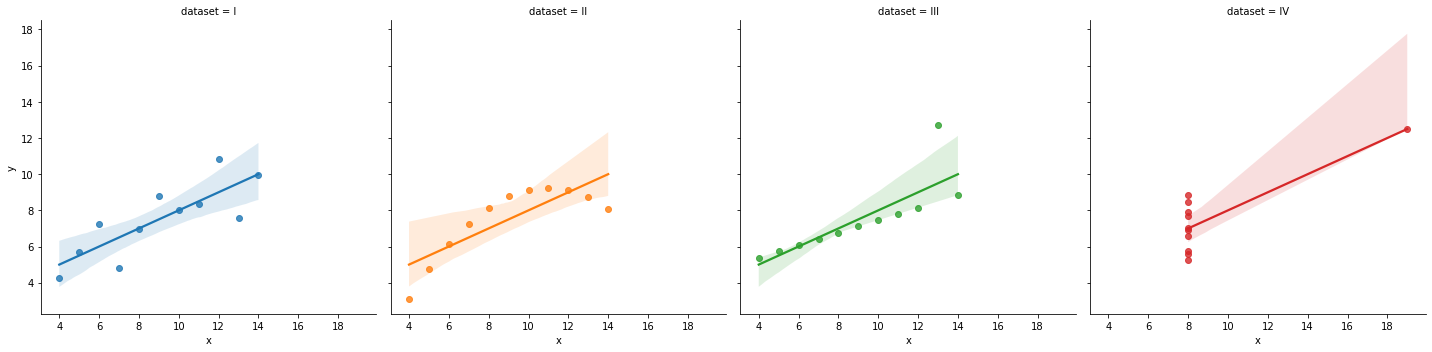

In [8]:
# Draw regression line
sns.lmplot(data=anscombe, x='x', y='y', col='dataset', hue='dataset')

In [9]:
def get_data(df, dataset_name):
    df = df[df.dataset == dataset_name]
    X = df[['x']]
    y = df['y']
    return X, y

In [10]:
# Function to analyse a given model
def analyze_model(name, model): 
    m = model
    m.fit(X, y)
    
    # R squared score
    r2 = m.score(X, y)
    
    # Prediction
    ypred= m.predict(X)
    
    # Prediction scores
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    msle = mean_squared_log_error(y, ypred)
    
    return name, {
        'R-squared': r2,
        "Mean absolute error": mae,
        "Mean squared error": mse,
        "Mean squared log error": msle,
    }, ypred

In [11]:
def get_dataset_results(name, X, y):
    # Analyze models
    results = []

    for model in all_models: 
        res = analyze_model(model[0], model[1])
        results.append(res)
    
    # Prepare for table presentation
    headers = [key for key in results[0][1].keys()]
    rows = [list(val) for val in (result[1].values() for result in results)]
    model_names = [result[0] for result in results]
    
    # Prepare for prediction plotting
    predictions = [(result[0], result[2]) for result in results]
    
    return name, headers, rows, model_names, predictions, X, y

In [12]:
# Models to be included
baseline = [
          ('Baseline model', DummyRegressor()),
]

models = [
          ('Linear Regression', LinearRegression()),
          # ('Lasso', Lasso()),
          # ('Ridge', Ridge()),
          ('Elastic Net', ElasticNet()),
          ('Decision Tree', DecisionTreeRegressor(max_depth=2)),
          ('Random Forest', RandomForestRegressor())
]

ensemble = [
          ('Ensemble of all models', VotingRegressor(models))
]

all_models = baseline + models + ensemble

In [13]:
dataset_results = []

dataset_names = anscombe.dataset.unique()
for ds in dataset_names: 
    X, y = get_data(anscombe, ds)
    results = get_dataset_results(ds, X, y)
    dataset_results.append(results)
    print('Dataset', ds, 'done')

Dataset I done
Dataset II done
Dataset III done
Dataset IV done


In [14]:
# Determine number of columns in tables
cols = 5

In [15]:
# Show results in table
for result in dataset_results: 
    name, headers, rows, model_names, predictions, X, y = result

    print('--------------------------')
    print(' Anscombe dataset', name)
    print('--------------------------')
    
    print()
    start = 0
    end = cols
    iterations = ceil(len(headers) / cols)    
    for i in range(iterations):
        # Print table
        print(tabulate([row[start:end] for row in rows], 
                       headers=headers[start:end],
                       showindex=model_names,
                       tablefmt='github', 
                       floatfmt='.3f'))
        print()
        print()
        start = end
        end = end + cols

--------------------------
 Anscombe dataset I
--------------------------

|                        |   R-squared |   Mean absolute error |   Mean squared error |   Mean squared log error |
|------------------------|-------------|-----------------------|----------------------|--------------------------|
| Baseline model         |       0.000 |                 1.555 |                3.752 |                    0.059 |
| Linear Regression      |       0.667 |                 0.837 |                1.251 |                    0.018 |
| Elastic Net            |       0.653 |                 0.875 |                1.302 |                    0.020 |
| Decision Tree          |       0.762 |                 0.753 |                0.892 |                    0.013 |
| Random Forest          |       0.883 |                 0.570 |                0.438 |                    0.007 |
| Ensemble of all models |       0.773 |                 0.723 |                0.853 |                    0.013 |


---

Anscombe dataset IV



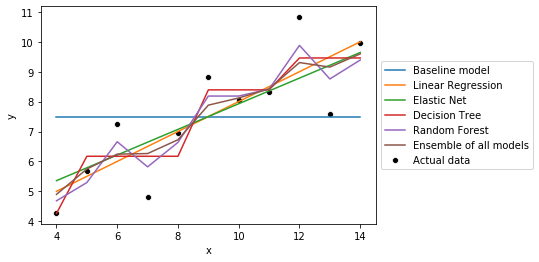

Anscombe dataset I



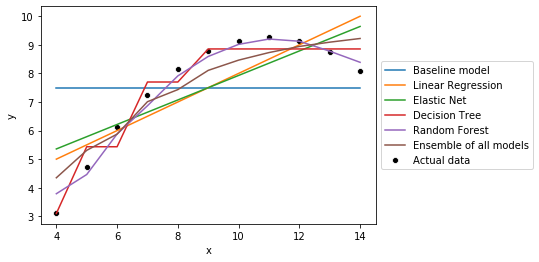

Anscombe dataset II



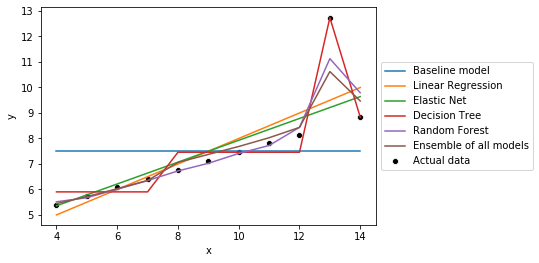

Anscombe dataset III



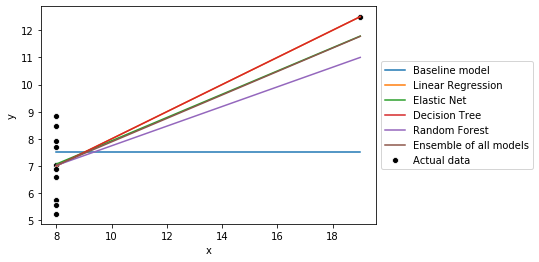

In [17]:
# Plot results
for result in dataset_results: 
    print('Anscombe dataset', name)
    print()
    name, headers, rows, model_names, predictions, X, y = result
    
    # Plot actual data
    sns.scatterplot(data=X, x=X.x, y=y, label='Actual data', color='black')
    
    # Plot predictions
    for p in predictions: 
        sns.lineplot(x=X.x, y=p[1], label=p[0])

    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    plt.show()